# ZOMATO RESTAURANT DATASET - EDA

The Zomato Restaurant Dataset is a comprehensive collection of restaurant data sourced from the popular online food delivery platform,



This dataset contains information about various restaurants listed on the platform, including their location, cuisine type, ratings, user reviews, and other essential attributes.
The data is designed to help researchers, data enthusiasts, and analysts gain insights into the restaurant industry, customer preferences, and regional culinary trends.

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

## Data

In [2]:
df=pd.read_csv('zomato.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [3]:
df.shape

(7105, 12)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [5]:
df.isnull().sum() # check missing values

Unnamed: 0.1              0
Unnamed: 0                0
restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

Unnamed: 0.1             7105
Unnamed: 0               7105
restaurant name          7105
restaurant type            81
rate (out of 5)            31
num of ratings            935
avg cost (two people)      65
online_order                2
table booking               2
cuisines type            2175
area                       30
local address              90
dtype: int64

## Preparation

In [8]:
# copy data
res_df=df.copy()

In [9]:
res_df=res_df.drop(['Unnamed: 0.1','Unnamed: 0'],axis='columns') # Drop first two columns
res_df.columns

Index(['restaurant name', 'restaurant type', 'rate (out of 5)',
       'num of ratings', 'avg cost (two people)', 'online_order',
       'table booking', 'cuisines type', 'area', 'local address'],
      dtype='object')

In [10]:
# Rename columns
res_df.columns=['Restaurant_Name','Restaurant_type','Rating','Num_of_Ratings','Avg_cost(Twopeople)','Online_order','Table_booking','Cuisines_type','Area','Local_address']

In [11]:
res_df=res_df.dropna() # drop null values

In [12]:
res_df.isnull().sum() 

Restaurant_Name        0
Restaurant_type        0
Rating                 0
Num_of_Ratings         0
Avg_cost(Twopeople)    0
Online_order           0
Table_booking          0
Cuisines_type          0
Area                   0
Local_address          0
dtype: int64

In [13]:
res_df.head()

,Restaurant_Name,Restaurant_type,Rating,Num_of_Ratings,Avg_cost(Twopeople),Online_order,Table_booking,Cuisines_type,Area,Local_address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


## EDA

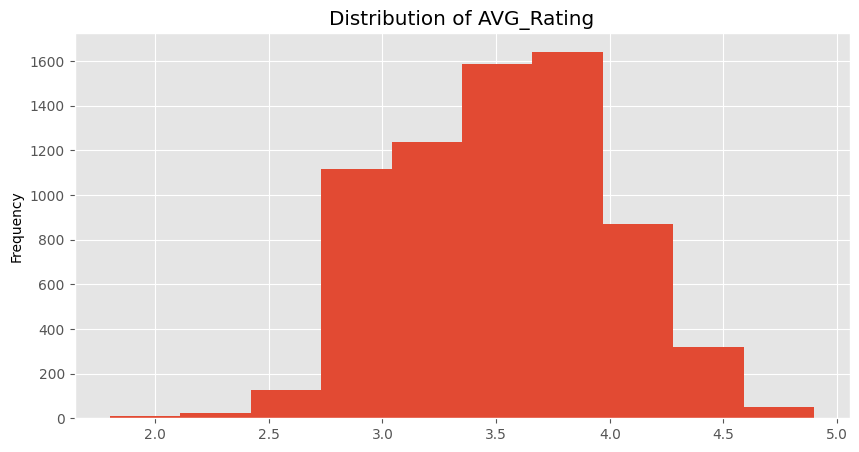

In [14]:
# Histogram plot
plt.figure(figsize=(10,5),dpi=100)

res_df['Rating'].plot(kind='hist')
plt.title('Distribution of AVG_Rating')
plt.show()


* Normaly Distributed
* Over 1000 customers have rated it between 3 and 4.
* The highest frequency is above 1600 with 3.5 ratings

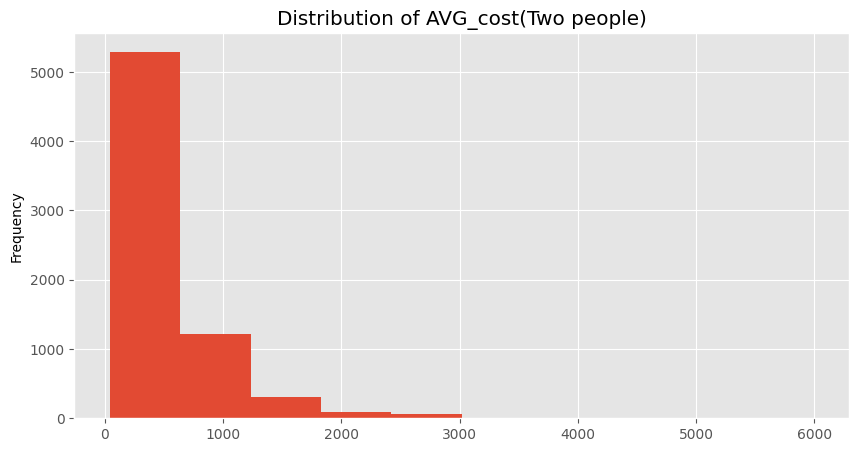

In [15]:
# Histogram plot
plt.figure(figsize=(10,5),dpi=100)

res_df['Avg_cost(Twopeople)'].plot(kind='hist')
plt.title('Distribution of AVG_cost(Two people)')
plt.show()

* Right Skewed Distribution

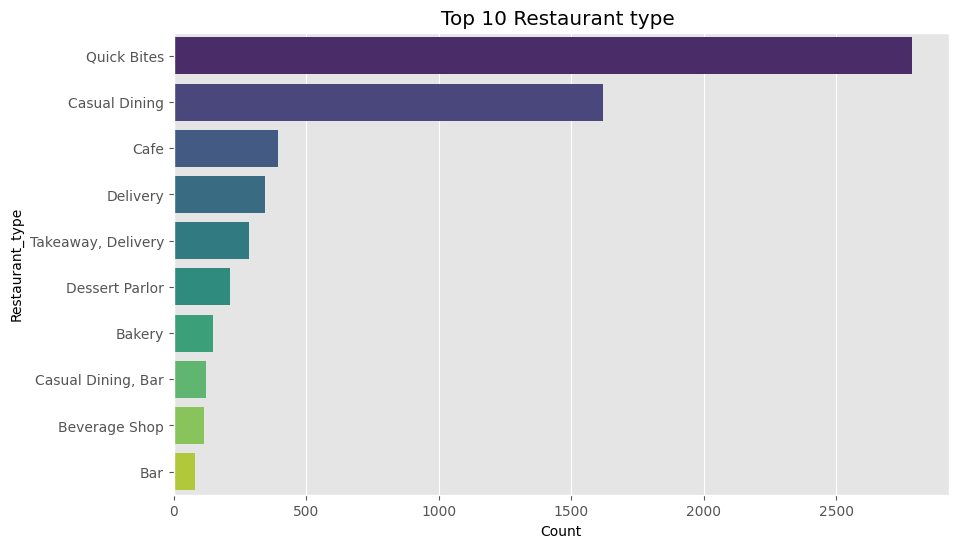

In [16]:
top_categories = res_df['Restaurant_type'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 categories
df_top = res_df[res_df['Restaurant_type'].isin(top_categories)]

# Create a countplot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top, y='Restaurant_type', order=top_categories, palette='viridis')
plt.ylabel('Restaurant_type')
plt.xlabel('Count')
plt.title('Top 10 Restaurant type ')
plt.show()


##### "Quick Bites" type is the most preferred restaurant choice among customers

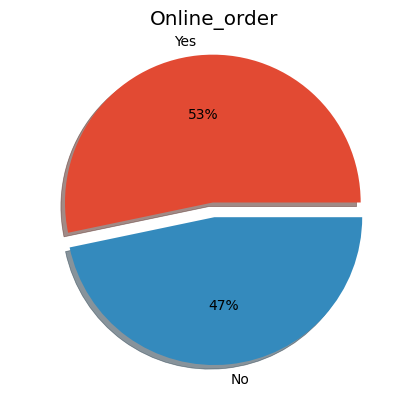

In [17]:
# Pie chart
res_df['Online_order'].value_counts(normalize=True).plot(kind='pie',shadow = True, autopct = '%1.0f%%',explode = (0.1,0))
plt.title('Online_order')
plt.ylabel(' ')
plt.show()

#### Customers predominantly prefer placing orders online, although the difference is minimal, being just 6%

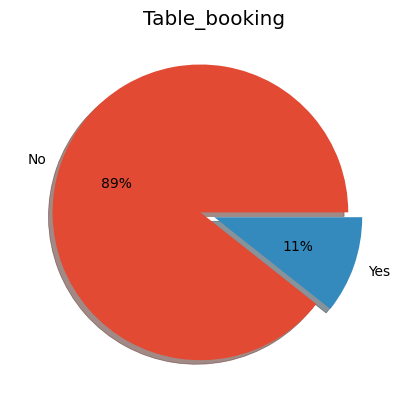

In [18]:
# Pie chart
res_df['Table_booking'].value_counts(normalize=True).plot(kind='pie',shadow = True, autopct = '%1.0f%%',explode = (0.1,0))
plt.title('Table_booking')
plt.ylabel(' ')
plt.show()

#### Merely 11% of customers reserve tables

In [19]:
# Data manipulation for Top 10 Cuisines
cuisine_list=res_df['Cuisines_type'].str.split(', ').explode().reset_index(drop=True)
Cuisine_df = pd.DataFrame({'Cuisine': cuisine_list})
Cuisine_df=Cuisine_df['Cuisine'].value_counts(normalize=True)*100 
Top_Cuisine=Cuisine_df.reset_index().rename(columns={'index':'Cuisine','Cuisine':'Preference_Rate'})[:10]

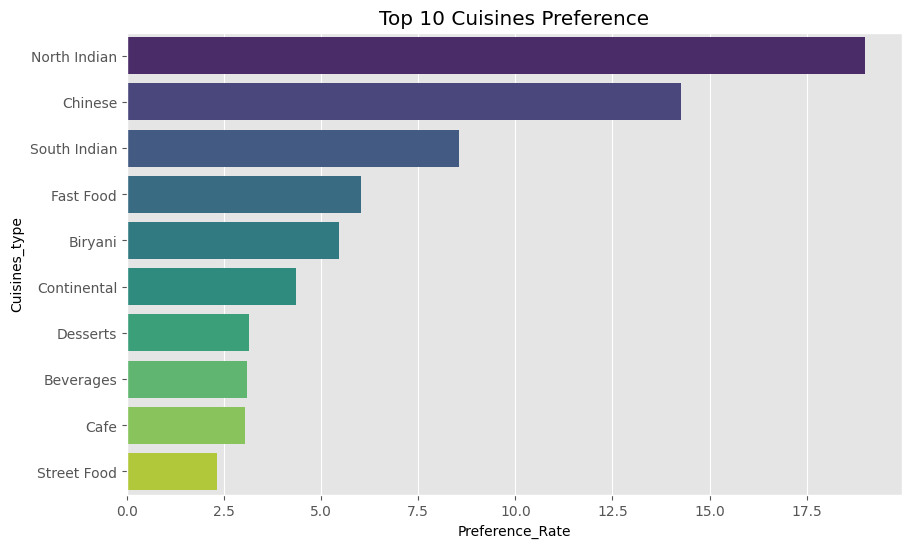

In [20]:
# Create a Barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=Top_Cuisine, y='Cuisine',x='Preference_Rate', palette='viridis')
plt.ylabel('Cuisines_type')
plt.xlabel('Preference_Rate')
plt.title('Top 10 Cuisines Preference')
plt.show()

#### Among all, North Indian and Chinese cuisines are the most preferred. After that, South Indian takes the 3rd place

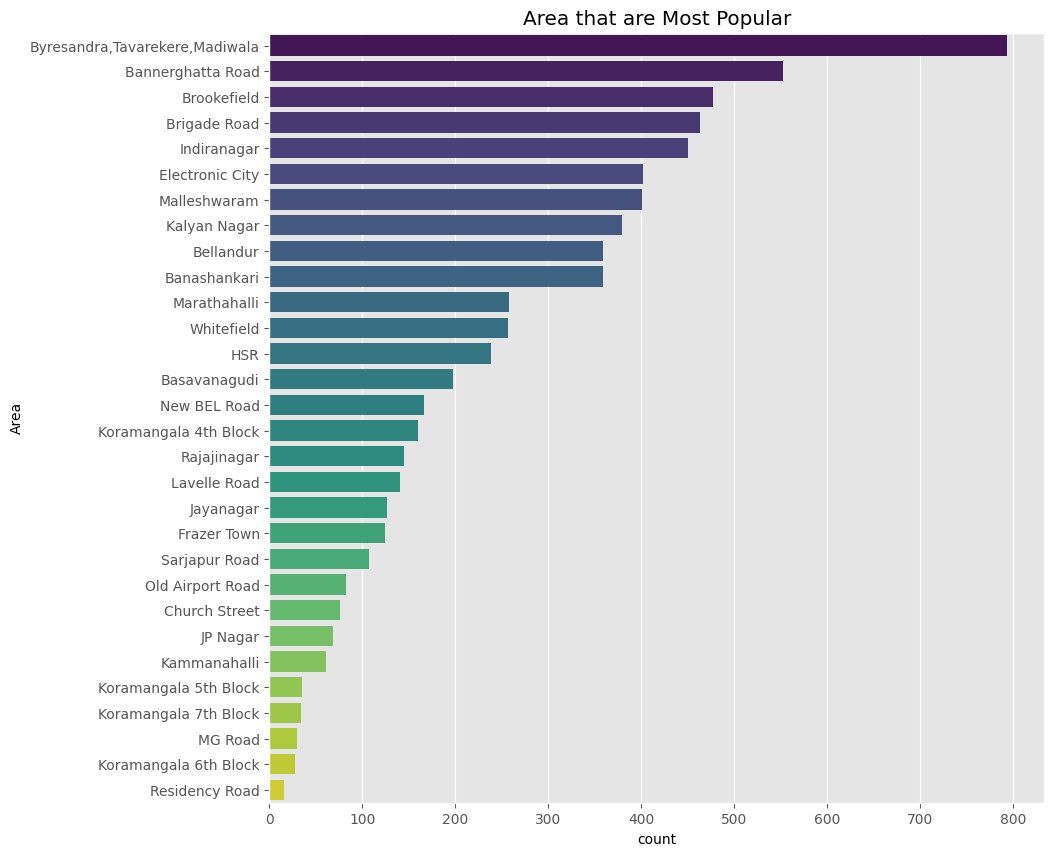

In [21]:
category_counts = res_df['Area'].value_counts()
plt.figure(figsize=(10, 10))

sns.countplot(data=res_df,y='Area',order=category_counts.index,palette='viridis')
plt.title('Area that are Most Popular')
plt.show()

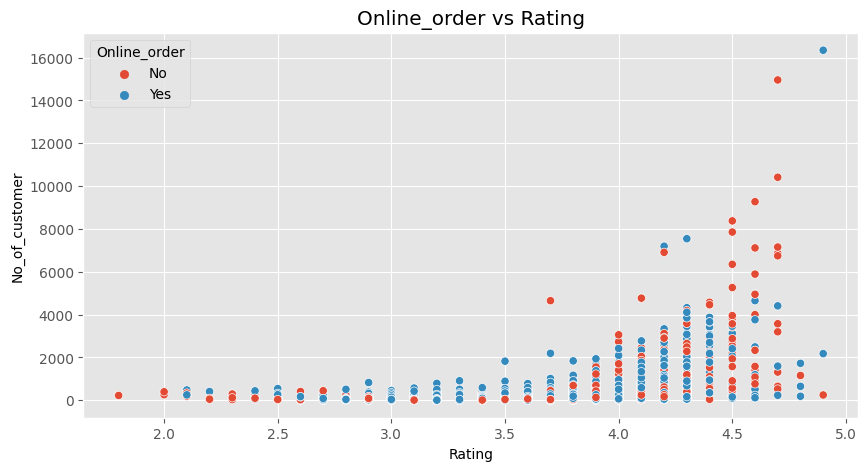

In [43]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=res_df, x='Rating',y='Num_of_Ratings',hue='Online_order')
plt.title('Online_order vs Rating')
plt.ylabel('No_of_customer')
plt.show()

#### Customers who order online have given ratings spread across the entire range

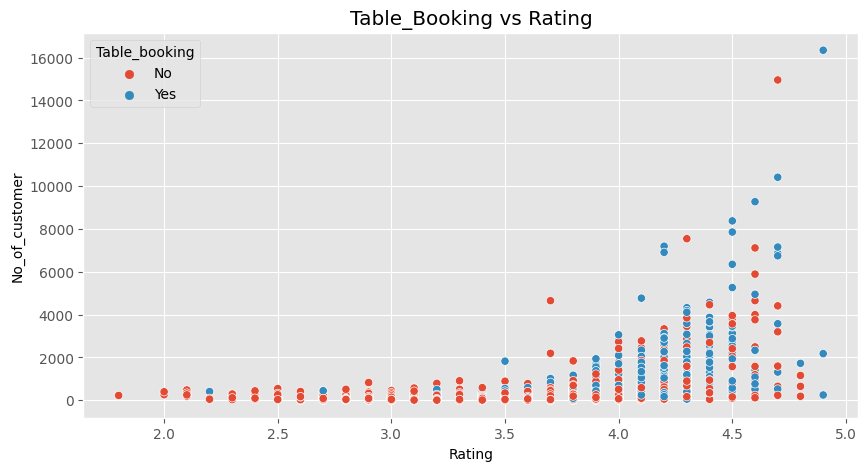

In [45]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=res_df, x='Rating',y='Num_of_Ratings',hue='Table_booking')
plt.title('Table_Booking vs Rating')
plt.ylabel('No_of_customer')
plt.show()

##### Ratings between 3.5 and 5.0 are from customers who made table bookings.